In [1]:
!conda install -c anaconda sqlalchemy --yes

Solving environment: done

# All requested packages already installed.



In [2]:
from sqlalchemy import create_engine
from sqlalchemy import inspect 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt


In [3]:
engine = create_engine("sqlite:///mta_data.db")

In [4]:
df = pd.read_sql('SELECT * FROM mta_data GROUP BY Entries;', engine)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,06/19/2021,00:00:00,REGULAR,0,906
1,A081,R028,04-05-01,FULTON ST,ACJZ2345,BMT,06/19/2021,03:00:00,REGULAR,1,843
2,G009,R151,02-05-01,CONEY IS-STILLW,DFNQ,BMT,06/19/2021,01:00:00,REGULAR,2,342
3,C008,R099,00-04-01,DEKALB AV,BDNQR,BMT,06/19/2021,00:00:00,REGULAR,3,2254
4,H007A,R248,02-05-00,1 AV,L,BMT,06/19/2021,08:00:00,REGULAR,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1801857,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,09:00:00,REGULAR,2147432276,671146444
1801858,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,05:00:00,REGULAR,2147432308,671146437
1801859,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,01:00:00,REGULAR,2147432311,671146430
1801860,J003,R352,00-00-00,HEWES ST,JM,BMT,04/16/2021,21:00:00,REGULAR,2147432315,671146416


In [5]:
df.STATION.count()

1801862

In [6]:
from scipy import stats
df=df[np.abs(df.ENTRIES-df.ENTRIES.mean()) <= (2*df.ENTRIES.std())]
# df[['ENTRIES', 'EXITS']] = df[['ENTRIES', 'EXITS']].replace([0, 'NaN'], [np.nan, np.nan])
# df = pd.read_sql('DELETE FROM mta_data WHERE ENTRIES and EXITS IS NULL')
# df.ENTRIES.value_counts()
# df.dropna(subset=['ENTRIES','EXITS'], inplace=True)

In [232]:
# SQL Commands - shows records with 0 entries and more than 1 exit, cannot remove as too difficult to determine if records are erroneuos
sql_commands=pd.read_sql('SELECT entries, exits FROM mta_data where entries=0 group by entries having count(exits>1);', engine)
sql_commands

,ENTRIES,EXITS
0,0,906


In [233]:
# SQL Commands
sql_commands_2=pd.read_sql('SELECT * FROM mta_data WHERE ENTRIES > 200000 AND EXITS > 200000 GROUP BY ENTRIES;', engine)
sql_commands_2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,D005,R398,00-00-03,NEW UTRECHT AV,ND,BMT,05/14/2021,01:00:00,REGULAR,200002,245453
1,D005,R398,00-00-03,NEW UTRECHT AV,ND,BMT,05/14/2021,05:00:00,REGULAR,200003,245455
2,PTH05,R543,00-01-03,EXCHANGE PLACE,1,PTH,04/08/2021,07:24:51,REGULAR,200006,247112
3,R221,R170,01-06-00,14 ST-UNION SQ,456LNQRW,IRT,06/23/2021,01:00:00,REGULAR,200007,1649524
4,R221,R170,01-06-00,14 ST-UNION SQ,456LNQRW,IRT,06/23/2021,05:00:00,REGULAR,200008,1649534
...,...,...,...,...,...,...,...,...,...,...,...
1518992,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,09:00:00,REGULAR,2147432276,671146444
1518993,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,05:00:00,REGULAR,2147432308,671146437
1518994,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,01:00:00,REGULAR,2147432311,671146430
1518995,J003,R352,00-00-00,HEWES ST,JM,BMT,04/16/2021,21:00:00,REGULAR,2147432315,671146416


In [11]:
#SQL Commands
test_2=pd.read_sql('SELECT * FROM mta_data WHERE ENTRIES > 200000 and EXITS > 200000 GROUP BY ENTRIES;', engine)
test_2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,D005,R398,00-00-03,NEW UTRECHT AV,ND,BMT,05/14/2021,01:00:00,REGULAR,200002,245453
1,D005,R398,00-00-03,NEW UTRECHT AV,ND,BMT,05/14/2021,05:00:00,REGULAR,200003,245455
2,PTH05,R543,00-01-03,EXCHANGE PLACE,1,PTH,04/08/2021,07:24:51,REGULAR,200006,247112
3,R221,R170,01-06-00,14 ST-UNION SQ,456LNQRW,IRT,06/23/2021,01:00:00,REGULAR,200007,1649524
4,R221,R170,01-06-00,14 ST-UNION SQ,456LNQRW,IRT,06/23/2021,05:00:00,REGULAR,200008,1649534
...,...,...,...,...,...,...,...,...,...,...,...
1518992,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,09:00:00,REGULAR,2147432276,671146444
1518993,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,05:00:00,REGULAR,2147432308,671146437
1518994,J003,R352,00-00-00,HEWES ST,JM,BMT,04/17/2021,01:00:00,REGULAR,2147432311,671146430
1518995,J003,R352,00-00-00,HEWES ST,JM,BMT,04/16/2021,21:00:00,REGULAR,2147432315,671146416


In [236]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [237]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day_of_week
1569541,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,05/24/2021,13:00:00,REGULAR,14455033,3980632,2021-05-24 13:00:00,0
3237,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,05/08/2021,17:00:00,REGULAR,3238,62,2021-05-08 17:00:00,5
874054,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/19/2021,01:00:00,REGULAR,3133585,397466,2021-06-19 01:00:00,5
874053,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/18/2021,13:00:00,REGULAR,3133584,397464,2021-04-18 13:00:00,6
874052,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/17/2021,17:00:00,REGULAR,3133583,397464,2021-04-17 17:00:00,5


In [238]:
df['day_of_week']=df.DATE_TIME.dt.weekday

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [239]:
#Removed duplicates turnstile entries
mask = ((df["C/A"] == "N071") & 
(df["UNIT"] == "R013") & 
(df["SCP"] == "00-00-01") & 
(df["STATION"] == "34 ST-PENN STA"))

In [240]:
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day_of_week
925646,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,06/25/2021,20:00:00,REGULAR,3506857,7812541,2021-06-25 20:00:00,4
925635,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,06/25/2021,16:00:00,REGULAR,3506771,7812321,2021-06-25 16:00:00,4
925624,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,06/25/2021,12:00:00,REGULAR,3506700,7812110,2021-06-25 12:00:00,4
925618,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,06/25/2021,08:00:00,REGULAR,3506657,7811918,2021-06-25 08:00:00,4
925617,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,06/25/2021,04:00:00,REGULAR,3506651,7811818,2021-06-25 04:00:00,4


In [241]:
df.DESC.value_counts()

REGULAR       1736925
RECOVR AUD       5495
Name: DESC, dtype: int64

In [242]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [243]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
296164,R250,R179,00-00-09,86 ST,05/17/2021,26
295706,R250,R179,00-00-03,86 ST,05/17/2021,25
295436,R250,R179,00-00-00,86 ST,05/17/2021,24
295615,R250,R179,00-00-02,86 ST,05/17/2021,23
296255,R250,R179,00-00-0A,86 ST,05/17/2021,22


In [244]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE",]).EXITS.count().reset_index().sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS
296164,R250,R179,00-00-09,86 ST,05/17/2021,26
295706,R250,R179,00-00-03,86 ST,05/17/2021,25
295436,R250,R179,00-00-00,86 ST,05/17/2021,24
295615,R250,R179,00-00-02,86 ST,05/17/2021,23
296255,R250,R179,00-00-0A,86 ST,05/17/2021,22


In [245]:
daily_entries = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"],as_index=False).ENTRIES.first()

In [246]:
daily_exits = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"],as_index=False).EXITS.first()

In [247]:
daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,00:00:00,7550517
1,A002,R051,02-00-00,59 ST,03/28/2021,16:00:00,7550582
2,A002,R051,02-00-00,59 ST,03/28/2021,20:00:00,7550675
3,A002,R051,02-00-00,59 ST,03/29/2021,00:00:00,7550709
4,A002,R051,02-00-00,59 ST,03/29/2021,04:00:00,7550713


In [248]:
daily_entries[["PREV_ENTRY_DATE", "PREV_ENTRIES"]] = (daily_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]].shift(1))

In [249]:
daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_ENTRY_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,00:00:00,7550517,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/28/2021,16:00:00,7550582,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/28/2021,20:00:00,7550675,03/28/2021,7550582.0
3,A002,R051,02-00-00,59 ST,03/29/2021,00:00:00,7550709,03/28/2021,7550675.0
4,A002,R051,02-00-00,59 ST,03/29/2021,04:00:00,7550713,03/29/2021,7550709.0


In [250]:
daily_entries.dropna(subset=["PREV_ENTRY_DATE"], axis=0, inplace=True)

In [251]:
daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_ENTRY_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,03/28/2021,16:00:00,7550582,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/28/2021,20:00:00,7550675,03/28/2021,7550582.0
3,A002,R051,02-00-00,59 ST,03/29/2021,00:00:00,7550709,03/28/2021,7550675.0
4,A002,R051,02-00-00,59 ST,03/29/2021,04:00:00,7550713,03/29/2021,7550709.0
5,A002,R051,02-00-00,59 ST,03/29/2021,08:00:00,7550725,03/29/2021,7550713.0


In [252]:
(daily_entries["ENTRIES"] - daily_entries["PREV_ENTRIES"]).describe()

count    1.737729e+06
mean    -6.061392e+02
std      7.104785e+05
min     -5.536499e+08
25%      1.400000e+01
50%      4.700000e+01
75%      1.120000e+02
max      5.347603e+08
dtype: float64

In [253]:
daily_entries[daily_entries["ENTRIES"] < daily_entries["PREV_ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A   UNIT  SCP       STATION       
A011  R080  01-03-03  57 ST-7 AV          1
            01-03-04  57 ST-7 AV          1
A013  R081  01-06-01  49 ST               1
A015  R081  00-00-02  49 ST               1
A033  R170  02-00-05  14 ST-UNION SQ      1
                                       ... 
R610  R057  00-04-00  ATL AV-BARCLAY      1
R612  R057  01-00-02  ATL AV-BARCLAY      1
R617  R058  00-00-02  BERGEN ST           1
R622  R123  00-00-00  FRANKLIN AV       536
S101  R070  00-00-04  ST. GEORGE          1
Length: 166, dtype: int64

In [254]:
def get_entry_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

daily_entries["DAILY_ENTRIES"] = daily_entries.apply(get_entry_counts, axis=1, max_counter=10000)

entries: 937 <-- 154694.0
entries: 3101 <-- 1390173.0
entries: 754 <-- 479907.0
entries: 1094 <-- 4341004.0
entries: 9464 <-- 18398491.0
entries: 262269 <-- 337910.0
entries: 304 <-- 13125.0
entries: 96 <-- 30798.0
entries: 266 <-- 1028362.0
entries: 286 <-- 765804.0
entries: 18182709 <-- 5120087.0
entries: 5120226 <-- 18182709.0
entries: 9728986 <-- 1159624.0
entries: 1159708 <-- 9728986.0
entries: 46377 <-- 1400021.0
entries: 2177 <-- 247962.0
entries: 26 <-- 56005.0
entries: 25 <-- 1400020.0
entries: 2474 <-- 327906.0
entries: 86 <-- 553649999.0
entries: 262152 <-- 229572623.0
entries: 15 <-- 5309746.0
entries: 262650 <-- 31670.0
entries: 262309 <-- 279345.0
entries: 331 <-- 2651127.0
entries: 393219 <-- 459438.0
entries: 3761 <-- 17275602.0
entries: 3790 <-- 863563.0
entries: 10190 <-- 366314.0
entries: 4 <-- 458758.0
entries: 393255 <-- 7714339.0
entries: 37856 <-- 24289.0
entries: 2328 <-- 59583.0
entries: 926 <-- 649205.0
entries: 458753 <-- 33554713.0
entries: 4218 <-- 629380.0

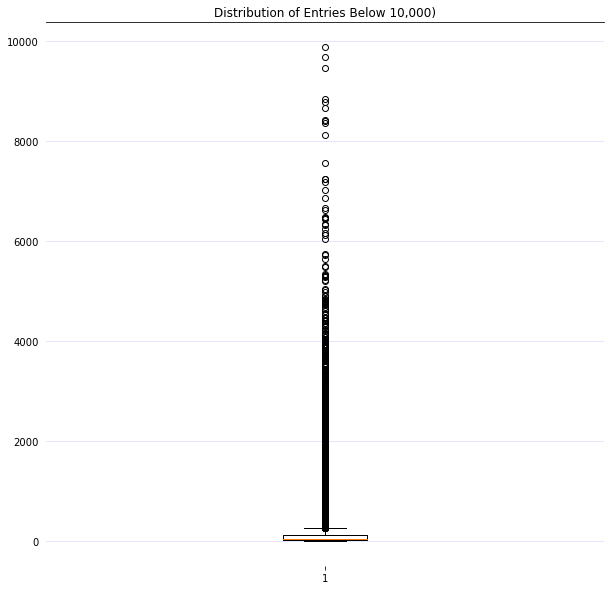

In [279]:
# Figure showing the distribution of Daily Entries when max_counter = 100,000
fig, ax = plt.subplots(figsize=(10, 10))


ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='blue', axis='y', linestyle='-', linewidth=1, alpha=0.1)

# Set plot title
ax.set_title('Distribution of Entries Below 10,000)')

# Box Plot
dataset_entries = daily_entries["DAILY_ENTRIES"]
ax.boxplot(dataset_entries)
plt.show()

In [256]:
daily_entries.DAILY_ENTRIES.describe()

count    1.737729e+06
mean     8.450561e+01
std      1.226899e+02
min      0.000000e+00
25%      1.400000e+01
50%      4.700000e+01
75%      1.120000e+02
max      9.880000e+03
Name: DAILY_ENTRIES, dtype: float64

In [ ]:
daily_entries['DATE']=pd.to_datetime(daily_entries['DATE'])
daily_entries['DAY_OF_WEEK']=daily_entries['DATE'].dt.dayofweek

In [ ]:
# Shows top 20 busiest Turnstiles (sum)
top_turns_sum = daily_entries.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
top_turns_sum['DATE']=pd.to_datetime(top_turns_sum['DATE'])
top_turns_sum['DAY_OF_WEEK']=top_turns_sum['DATE'].dt.day_name()
top_turns_sum.head()

In [ ]:
# Adding Mask
top_daily_station=daily_entries.groupby(['STATION','DAY_OF_WEEK']).DAILY_ENTRIES.sum().reset_index()
mask = ((top_daily_station["STATION"] == "PARSONS BLVD") | (top_daily_station["STATION"] == "CENTRAL PK N110") | (top_daily_station["STATION"] == "PELHAM BAY PARK") | (top_daily_station["STATION"] == "ST. GEORGE") | (top_daily_station["STATION"] == "WINTHROP ST"))
top_daily_station_sum=top_daily_station[mask].reset_index()

In [260]:
# Top Control Area 
top_station_ca=daily_entries.groupby(['STATION', 'C/A']).DAILY_ENTRIES.sum().reset_index()
mask_ca = ((top_station_ca["STATION"] == "PARSONS BLVD") | (top_station_ca["STATION"] == "CENTRAL PK N110") | (top_station_ca["STATION"] == "PELHAM BAY PARK") | (top_station_ca["STATION"] == "ST. GEORGE") | (top_station_ca["STATION"] == "WINTHROP ST"))
top_ca=top_station_ca[mask_ca].reset_index()
top_ca

,index,STATION,C/A,DAILY_ENTRIES
0,389,CENTRAL PK N110,R301,241799.0
1,634,PARSONS BLVD,N339,34146.0
2,635,PARSONS BLVD,N339A,210485.0
3,639,PELHAM BAY PARK,R423,239609.0
4,684,ST. GEORGE,S101,118291.0
5,685,ST. GEORGE,S101A,121084.0
6,734,WINTHROP ST,R637,237199.0


In [261]:
top_stations_sum = top_daily_station_sum.groupby(['STATION','DAY_OF_WEEK'])['DAILY_ENTRIES'].sum().reset_index()

top_stations_sum

,STATION,DAY_OF_WEEK,DAILY_ENTRIES
0,CENTRAL PK N110,0,34565.0
1,CENTRAL PK N110,1,39121.0
2,CENTRAL PK N110,2,37843.0
3,CENTRAL PK N110,3,39107.0
4,CENTRAL PK N110,4,38932.0
5,CENTRAL PK N110,5,29182.0
6,CENTRAL PK N110,6,23049.0
7,PARSONS BLVD,0,34936.0
8,PARSONS BLVD,1,40003.0
9,PARSONS BLVD,2,41594.0


In [262]:
top_stations_total=top_stations_sum.groupby(['STATION', 'DAY_OF_WEEK'])['DAILY_ENTRIES'].sum().reset_index()
top_stations_total

,STATION,DAY_OF_WEEK,DAILY_ENTRIES
0,CENTRAL PK N110,0,34565.0
1,CENTRAL PK N110,1,39121.0
2,CENTRAL PK N110,2,37843.0
3,CENTRAL PK N110,3,39107.0
4,CENTRAL PK N110,4,38932.0
5,CENTRAL PK N110,5,29182.0
6,CENTRAL PK N110,6,23049.0
7,PARSONS BLVD,0,34936.0
8,PARSONS BLVD,1,40003.0
9,PARSONS BLVD,2,41594.0


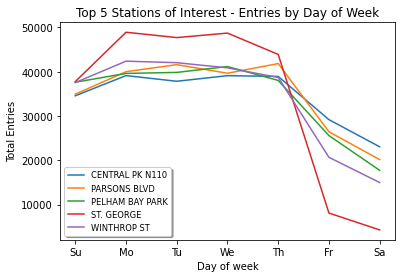

In [263]:
# Chart from problem 9 (MTA Pair 3), this will give them insight as to how they should rotate their streetment 

for i, group in top_stations_sum.groupby('STATION'):
    plt.plot(group["DAY_OF_WEEK"], group["DAILY_ENTRIES"], label=i)

plt.legend(shadow=True, loc=0, fontsize= 'small')
plt.xlabel('Day of week')
plt.ylabel('Total Entries')
plt.xticks(np.arange(7),['Su','Mo','Tu','We','Th','Fr','Sa'])
plt.title('Top 5 Stations of Interest - Entries by Day of Week');

plt.savefig('Top 5 Stations of interest - entries by day of week', bbox_inches = 'tight')

In [267]:
# Stations of Interest (the first five that are greater than the median )
top_stations_sum_old = daily_entries.groupby(['STATION'])['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

top_stations_sum_old.iloc[191:196].reset_index().sort_values('DAILY_ENTRIES', ascending=False)

,index,STATION,DAILY_ENTRIES
0,314,PARSONS BLVD,244631.0
1,179,CENTRAL PK N110,241799.0
2,318,PELHAM BAY PARK,239609.0
3,344,ST. GEORGE,239375.0
4,372,WINTHROP ST,237199.0


In [268]:
# Busiest Days of week
top_days=daily_entries.copy()
top_days['DATE']=pd.to_datetime(top_days['DATE'])
top_days['DAY_OF_WEEK']=top_days['DATE'].dt.weekday
top_days=top_days.groupby('DAY_OF_WEEK')['DAILY_ENTRIES'].sum().reset_index().sort_values('DAILY_ENTRIES')
top_days.head(7)

,DAY_OF_WEEK,DAILY_ENTRIES
6,6,12740086.0
5,5,16973607.0
0,0,20989911.0
1,1,23531508.0
2,2,24175439.0
3,3,24190930.0
4,4,24246375.0


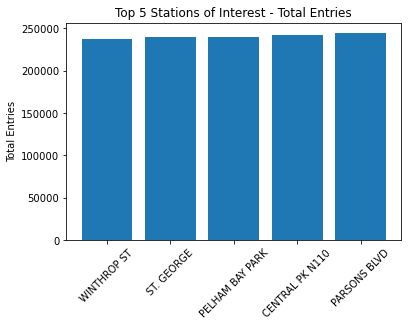

In [270]:
interest=top_stations_sum_old.iloc[191:196].reset_index().sort_values('DAILY_ENTRIES')
interest
plt.bar(x=interest['STATION'], height=interest['DAILY_ENTRIES'])
plt.xticks(rotation=45);
plt.ylabel("Total Entries");
plt.title('Top 5 Stations of Interest - Total Entries');
plt.savefig('Top 5 Stations of Interest - Total Entries.png', bbox_inches = 'tight')

In [273]:
# import matplotlib.pyplot as plt
# plt.bar(x=top_stations_sum['DAY_OF_WEEK'], height=top_stations_sum['DAILY_ENTRIES'])
# plt.xticks(rotation=45);
# plt.ylabel("Total Entries");
# plt.title('Top 5 Stations Entries by Day of Week');
# plt.xticks(np.arange(7),['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])
# plt.savefig('Top_5_Stations_Entries_by_Weekday(NEW).png', bbox_inches = 'tight')

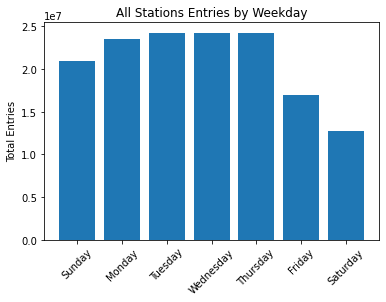

In [274]:
import matplotlib.pyplot as plt
plt.bar(x=top_days['DAY_OF_WEEK'], height=top_days['DAILY_ENTRIES'])
plt.xticks(rotation=45);
plt.ylabel("Total Entries");
plt.title('All Stations Entries by Weekday');
plt.xticks(np.arange(7),['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.savefig('All_Stations_Entries_by_weekday.png', bbox_inches = 'tight')

In [210]:
# Hourly entries and stations of interest 
top_hours=daily_entries.groupby(['STATION','TIME']).DAILY_ENTRIES.sum().reset_index()
mask_hours = ((top_hours["STATION"] == "PARSONS BLVD") | (top_hours["STATION"] == "CENTRAL PK N110") | (top_hours["STATION"] == "PELHAM BAY PARK") | (top_hours["STATION"] == "ST. GEORGE") | (top_hours["STATION"] == "WINTHROP ST"))
top_hours=top_hours[mask_hours].reset_index()
top_hours

,index,STATION,TIME,DAILY_ENTRIES
0,3697,CENTRAL PK N110,00:00:00,26144.0
1,3698,CENTRAL PK N110,04:00:00,4673.0
2,3699,CENTRAL PK N110,08:00:00,31426.0
3,3700,CENTRAL PK N110,10:53:31,432.0
4,3701,CENTRAL PK N110,12:00:00,54320.0
5,3702,CENTRAL PK N110,16:00:00,62691.0
6,3703,CENTRAL PK N110,20:00:00,62113.0
7,28024,PARSONS BLVD,00:00:00,18262.0
8,28025,PARSONS BLVD,04:00:00,9181.0
9,28026,PARSONS BLVD,08:00:00,59320.0


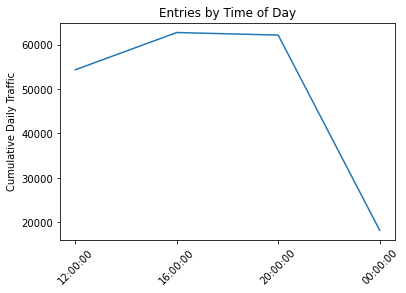

In [276]:
import matplotlib.pyplot as plt
plt.plot(top_hours['TIME'][4:8], top_hours['DAILY_ENTRIES'][4:8])
plt.xticks(rotation=45);
plt.ylabel("Cumulative Daily Traffic");
plt.title('Entries by Time of Day');